<a href="https://colab.research.google.com/github/jahidhasan299/jahidhasan299-Deep-Learning-With-7-Real-Projects/blob/main/Newsgroup_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Inrtoduction
The project is about 20 newsgroups dataset and it's composed of text taken from newsgroup articles. It was collected by Ken Lang

The data contains approximately 20000 documents across 20 online newsgroups. A newsgroup is place on the internet where people can ask  and answers questions about a certain topic.

All the topcis are listed here:

1. comp. graphics
2. comp.os.ms-windows.misc
3. comp.sys.imb-pc.hardware
4. comp.sys.mac.hardware
5. comp.windows.
6. rec.autos
7. rec.motocycles
8. rec.sport.baseball
9. rec.sport.hockey



---
**sci.crypt**

1. sci.electronics
2. sci.med
3. sci.space
4. misc.forscale
5. talk.politics.misc
6. talk.politics.guns
7. talk.politics.mideast
8. talk.religion.misc
9. alt.atheims
10. soc.religion.charistian

# Import Important Library and Dataset

In [25]:
from sklearn.datasets import fetch_20newsgroups
groups = fetch_20newsgroups()

1. subset. Default value is train. Description is the dataset to load, the  training set and testing set orboth

2. data_ home. Default value: sklearn_ data. Description is Directory where t  files are stored and catched

3. categories. Default value: None. Description is List of newsgroups to load  if None all newsgroups will be loaded

4. shuffle. Default value: True. Description is Boolan which will indicate  whether to suffle the data

5. random_ state. Default value: 43. Description will be random seed integer  used to shuffle the data

6. remove. Default value: 0. Descriotion is tuple which indicate the part  among header, footer and quote of each newsgroup post to omot. Nothing is  removed by default

7. download_ if_ missing. Default : true. Bolean value indicate whether to  download the data if it is not found locally

# Exploring the data

In [26]:
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [27]:
groups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [28]:
print(groups.target)

[7 4 4 ... 3 1 8]


In [29]:
# Find the distinct values for these integers
import numpy as np
print(np.unique(groups.target))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


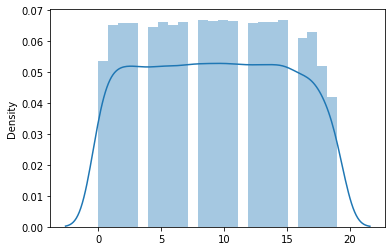

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(groups.target)
plt.show()

In [31]:
# First document
groups.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [32]:
# Topic number
groups.target[0]

7

In [33]:
# Topic name
groups.target_names[groups.target[0]]

'rec.autos'

# Counting the occerences of each word token
We can also view a text as a colletion of words. This is called the Bag of Words(BAW)model.  We can optionally define a more complex model that takes into account the order of words and Pos tags   We begin by converting documents into a maxtrix where each row represents each newsgroup document and each column re  token, or sepecifically, a unigram to begin with. And the of each element in the maxtrix is the number of times the word  the document(row).

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

1. ngram_ range (1,1) lower and upper bound of the n-grams to be extracted in the input text, for example (1,1) means unigrams, (1,2) means unigram and bigran

2. stop_ words Nonea. which stop word list to use, can be " english" referring to the built in list or a customized input list. If none no words will be removed

3. lowercase. True, whether or not converting all characters to lowercase 2. max_ feature. None, The number of top (most frequent) tokens to consider,or all tokens if None

4. Binary False. if true all non-zero counts become 1st

In [ ]:
count_vector = CountVectorizer(max_features=500)
# use it to fit on the raw text data
data_count = count_vector.fit_transform(groups.data)
print(data_count)

In [40]:
data_count[0]

<1x500 sparse matrix of type '<class 'numpy.int64'>'
	with 53 stored elements in Compressed Sparse Row format>

In [41]:
data_count

<11314x500 sparse matrix of type '<class 'numpy.int64'>'
	with 798221 stored elements in Compressed Sparse Row format>

The resulting count matrix is a sparse matrix where each row stores non-zero elements(hence, 798221 elements instead of 11314*500 = 56700000)

In [42]:
data_count.toarray()

array([[0, 0, 0, ..., 0, 2, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data_count.toarray()[0]

In [ ]:
print(count_vector.get_feature_names_out())

The most popular tokens are numbers or letters with numbers such as a86 which do not convey important information.

words that have no actual meaning. They are you, them and then some words contain indentical information.For example, tell, told use and used time and times

# Text Preprocessing
Let's begin by retaining letter only words. Remove all the numbers and combination of letters and numbers.

In [45]:
data_cleaned = []
for doc in groups.data:
  doc_cleaned = ' '.join(word for word in doc.split()
  if word.isalpha())
  data_cleaned.append(doc_cleaned)

# Droping stop words
Stops words are those common words that provides little value in helping to differentail documents.In general stop word add noise to the Bow model can be removed

In [48]:
from sklearn.feature_extraction import _stop_words
print(_stop_words.ENGLISH_STOP_WORDS)

frozenset({'already', 'seeming', 'serious', 'thence', 'elsewhere', 'seems', 'eight', 'now', 'call', 'every', 'how', 'these', 'were', 'ltd', 'whereupon', 'he', 'eleven', 'amount', 'over', 'much', 'bill', 'had', 'no', 'neither', 'another', 'beforehand', 'third', 'indeed', 'go', 'about', 'bottom', 'forty', 'anywhere', 'everyone', 'each', 'ten', 'whereas', 'him', 'since', 'afterwards', 'me', 'whereby', 'ourselves', 'us', 'namely', 'see', 'never', 'un', 'last', 'from', 'his', 'former', 'our', 'via', 'everywhere', 'its', 'between', 'whither', 'enough', 'someone', 'yourself', 'around', 'then', 'thick', 'myself', 'sincere', 'whose', 'detail', 'mostly', 'was', 'noone', 'can', 'are', 'should', 'even', 'whereafter', 'etc', 'cry', 'besides', 'if', 'out', 'none', 'the', 'inc', 'will', 'most', 'who', 'several', 'has', 'herself', 'few', 'by', 'fire', 'where', 'latter', 'always', 'give', 'nor', 'something', 'though', 'thin', 'sometimes', 'con', 'it', 'mine', 'up', 'without', 'less', 'twenty', 'couldnt

In [50]:
count_vector_sw = CountVectorizer(stop_words="english", max_features=500)

# Reducing inflectional and derivational forms of words

We have 2 strategies to deal with words from the same root. Stemming and Lemmatization.

Stemming is a quicker approach that involves, if neccessary, chopping off letters, for example, words becomes word after stemming, trying and try become tri

Lemmatizing, on the other hand, is slower but more accurate. It performs dictionary lookup and guaranttes to return a valid word

In [63]:
from nltk.corpus import names
import nltk
nltk.download('names')
nltk.download('wordnet')

all_names = set(names.words())
count_vector_sw = CountVectorizer(stop_words = "english" , max_features=500)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data_cleaned = []
for doc in groups.data:
  doc = doc.lower()
  doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split()
  if word.isalpha() and word not in all_names)
  data_cleaned.append(doc_cleaned)
data_cleaned_count_3= count_vector_sw.fit_transform(data_cleaned)

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
print(count_vector_sw.get_feature_names_out())

# T-SNE for Dimentaionality Reduction
t-SNE for dimensionality reduction. t-SNE stands for t-distributed Stochastic Neighbor Embedding

It is a nonlinear dimensionality reduction technique developed by Laurens Van der Maaten and Geoffrey Hinton.

As its name implies, t-SNE embeds high-dimensional data into a low dimensional (usally two-dimensional or 3-dimensional) space where similarity among data samples (neighbor information is preserved)

Similarity and neighbor distances are measured by Euclidean distance or other metrics

In [91]:
from sklearn.manifold import TSNE
# 3 distinct topics talk.religion.misc, comp.graphics and sci.space
categories_3 = ['talk.religion.misc', 'comp.graphics', 'sci.space']
groups_3 = fetch_20newsgroups(categories = categories_3)

In [94]:
from nltk.corpus import names
all_names = set(names.words())

count_vector_sw = CountVectorizer(stop_words = "english" , max_features=500)

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

data_cleaned = []

for doc in groups.data:
  doc = doc.lower()
  doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split()if word.isalpha() and word not in all_names)
  data_cleaned.append(doc_cleaned)

data_cleaned_count_3 = count_vector_sw.fit_transform(data_cleaned)

In [95]:
tsne_model = TSNE(n_components=2, perplexity=40, random_state=42, learning_rate=500)
data_tnse = tsne_model.fit_transform(data_cleaned_count_3.toarray())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


1. n_component:  The output dimension
2. perlexity: The number of nearest data point considered neighbors in the algorithms with a typical value of between 5 and 50

ValueError: ignored

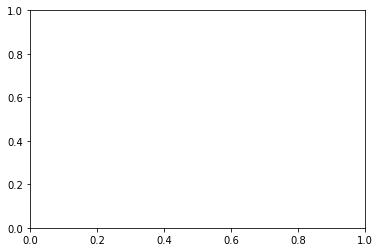

In [96]:
import matplotlib.pyplot as plt
plt.scatter(data_tnse[:, 0], data_tnse[:, 1], c=groups_3.target)
plt.show()

In [97]:
categories_5 = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','comp.windows.x',]
groups_5 = fetch_20newsgroups(categories=categories_5)

count_vector_sw = CountVectorizer(stop_words = "english" , max_features=500)

data_cleaned = []

for doc in groups.data:
  doc = doc.lower()
  doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split()if word.isalpha() and word not in all_names)
  data_cleaned.append(doc_cleaned)
data_cleaned_count_5= count_vector_sw.fit_transform(data_cleaned)

data_tnse = tsne_model.fit_transform(data_cleaned_count_5.toarray())
plt.scatter(data_tnse[:, 0], data_tnse[:, 1], c=groups_5.target)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-97-4a2c6107feb9>", line 14, in <module>
    data_tnse = tsne_model.fit_transform(data_cleaned_count_5.toarray())
  File "/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py", line 1108, in fit_transform
    embedding = self._fit(X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py", line 947, in _fit
    distances_nn = knn.kneighbors_graph(mode="distance")
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 886, in kneighbors_graph
    A_data, A_ind = self.kneighbors(X, n_neighbors, return_distance=True)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 759, in kneighbors
    **kwds,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py", line 1726, in pai

KeyboardInterrupt: ignored